<a href="https://colab.research.google.com/github/aadityane93/Machine_Learning_Notebooks/blob/main/Heart_Attack_Predictor_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Dataframe
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  


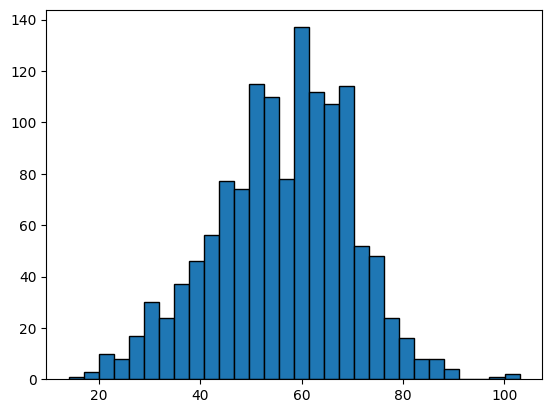


 Labelled and Scaled Dataframe
        Age  Gender  Heart rate  Systolic blood pressure  \
0  0.572358       1    0.042163                 1.257215   
1 -2.579640       1    0.067828                -1.117098   
2 -0.087363       1    0.040330                 1.257215   
3  0.572358       1    0.045830                -0.274600   
4 -0.087363       1    0.040330                -0.580963   

   Diastolic blood pressure  Blood sugar     CK-MB  Troponin  Result  
0                  0.764927     0.247036  0.004935  0.001068       0  
1                 -1.872542     0.515810  0.021453  0.102826       1  
2                  0.337229     0.464427  0.005569  0.000194       0  
3                 -1.230995     0.464427  0.045212  0.011749       1  
4                 -0.518166     0.523715  0.002533  0.000194       0  

 no. of rows for this dataset: 200
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.83   

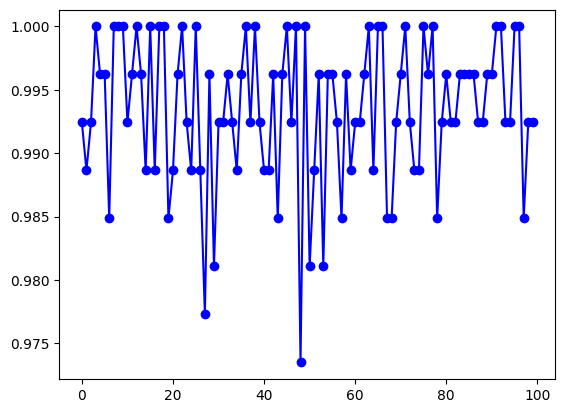

In [3]:
#https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid/code


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

#Original Dataset
dforiginal = pd.read_csv("Medicaldataset.csv")
print("\n Dataframe")
print(dforiginal.head())


#Labelling Results
labelencoder = LabelEncoder().fit(["positive","negative"])
dforiginal["Result"] = labelencoder.transform(dforiginal["Result"])

#histogram
plt.hist(dforiginal["Age"], bins=30, edgecolor='black')
plt.show()

#standardization and normalization
ss = StandardScaler()
mms = MinMaxScaler()
dforiginal[["Age","Diastolic blood pressure","Systolic blood pressure"]] = ss.fit_transform(dforiginal[["Age","Diastolic blood pressure","Systolic blood pressure"]])
dforiginal[["Troponin", "CK-MB","Blood sugar","Heart rate"]] = mms.fit_transform(dforiginal[["Troponin", "CK-MB", "Blood sugar","Heart rate"]])
print("\n Labelled and Scaled Dataframe")
print(dforiginal.head())


#Making dataframes of 200, 500 rows
df200 = dforiginal[:200]
df500 = dforiginal[:500]



#XGBoost - different datase
def train_and_test(df):
    print("\n no. of rows for this dataset:", df.shape[0])
    train_feature, test_feature, train_target, test_target = train_test_split(df.drop(["Result"],axis=1),df["Result"],test_size=0.2,random_state=10)
    model = XGBClassifier()
    model.fit(train_feature,train_target)
    y_pred = model.predict(test_feature)
    accuracy = accuracy_score(test_target, y_pred)
    precision = precision_score(test_target, y_pred, average='weighted')
    print(classification_report(test_target, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(confusion_matrix(test_target, y_pred))


train_and_test(df200)
train_and_test(df500)
train_and_test(dforiginal)




#XGBoost - Bootstrapping
accuracies = []
precisions = []
def train_and_test_bootstrapping(df, n=100):
    model = XGBClassifier()
    print(f"\n Bootstrapping with {n} dataframe samples:")
    for i in range(n):
        df_boot = df.sample(n=len(df), replace=True, random_state=i)
        train_feature, test_feature, train_target, test_target = train_test_split(df_boot.drop(["Result"],axis=1),df_boot["Result"],test_size=0.2,random_state=10)
        model.fit(train_feature,train_target)
        y_pred = model.predict(test_feature)
        accuracy = accuracy_score(test_target, y_pred)
        accuracies.append(accuracy)
        precision = precision_score(test_target, y_pred, average='weighted')
        precisions.append(precision)
    accuracy_final= np.array(accuracies)
    precision_final= np.array(precisions)
    print(f"Average Precision: {np.mean(precision_final):.4f}")
    print(f"Average Accuracy: {np.mean(accuracy_final):.4f}")
    print(f"Standard deviation: {np.std(accuracy_final):.4f}")
    print(f"Min accuracy: {np.min(accuracy_final):.4f}")
    print(f"Max accuracy: {np.max(accuracy_final):.4f}")


train_and_test_bootstrapping(dforiginal)


#line graph of accuracies
plt.plot(range(0, 100), accuracies, marker='o', linestyle='-', color='blue')
plt.show()